# 天文数据分析课后作业（赵永恒老师）

## 杨浩楠 201928002509038

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import stats
from scipy import signal

### 1. 用随机序列说明，在求均值时，$n$ 次测量的误差是其本身误差的 $\frac{1}{\sqrt{n}}$ 倍。 

In [2]:
# 使用正态分布随机数来进行检验
mu = 10
sigma = 5

# 检查10次测量的结果
n = 10
x_m = []
for i in range(100000):
    x = np.random.normal(mu,sigma,n)
    x_m.append(np.mean(x))

sigma_1 = np.std(x_m)
ratio = sigma_1/sigma

print('本身误差：', sigma)
print('%d次测量误差：'%(n), '%(s).5f'%{'s':sigma_1})
print('%d次测量误差和本身误差之比：'%(n), '%(r).5f'%{'r':ratio})
print('n^(-1/2)= %(d).5f' %{'d':1/n**0.5})

本身误差： 5
10次测量误差： 1.58463
10次测量误差和本身误差之比： 0.31693
n^(-1/2)= 0.31623


In [3]:
# 检查100次测量的结果
n = 100
x_m = []
for i in range(100000):
    x = np.random.normal(mu,sigma,n)
    x_m.append(np.mean(x))

sigma_1 = np.std(x_m)
ratio = sigma_1/sigma

print('本身误差：', sigma)
print('%d次测量误差：'%(n), '%(s).5f'%{'s':sigma_1})
print('%d次测量误差和本身误差之比：'%(n), '%(r).5f'%{'r':ratio})
print('n^(-1/2)= %(d).5f' %{'d':1/n**0.5})

本身误差： 5
100次测量误差： 0.50085
100次测量误差和本身误差之比： 0.10017
n^(-1/2)= 0.10000


In [4]:
# 检查1000次测量的结果
n = 1000
x_m = []
for i in range(100000):
    x = np.random.normal(mu,sigma,n)
    x_m.append(np.mean(x))

sigma_1 = np.std(x_m)
ratio = sigma_1/sigma

print('本身误差：', sigma)
print('%d次测量误差：'%(n), '%(s).5f'%{'s':sigma_1})
print('%d次测量误差和本身误差之比：'%(n), '%(r).5f'%{'r':ratio})
print('n^(-1/2)= %(d).5f' %{'d':1/n**0.5})

本身误差： 5
1000次测量误差： 0.15792
1000次测量误差和本身误差之比： 0.03158
n^(-1/2)= 0.03162


### 2. 随机产生出100个整数（可重复），组成 {$x_i$}。以 {$x_i$} 的分布产生出10000个随机数，构成 {$y_i$}。并用KS检验说明 {$x_i$} 和 {$y_i$} 的分布是否一致。

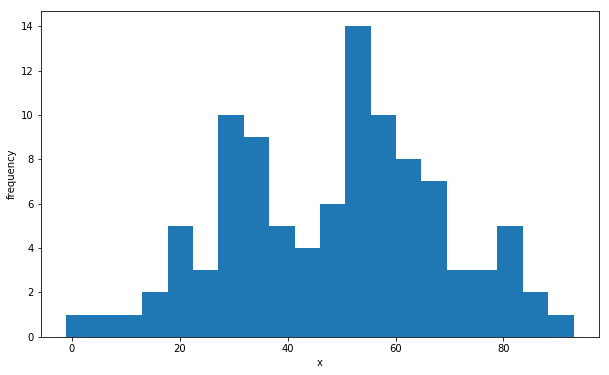

In [5]:
# 使用正态分布随机数来进行检验
mu = 50
sigma = 20

n1 = 100
x = np.random.normal(mu,sigma,n1)
x = [int(a) for a in x]
    
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.hist(x, bins=20)
ax.set_xlabel('x')
ax.set_ylabel('frequency')
plt.show()

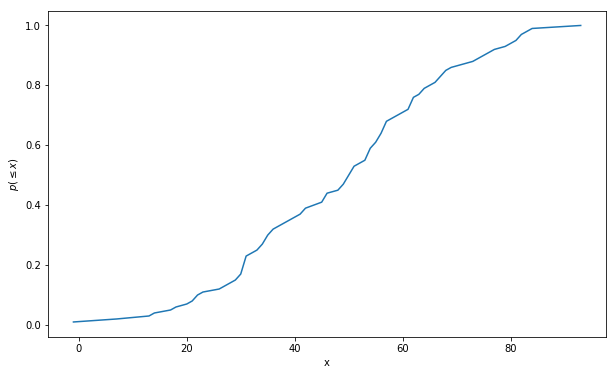

In [6]:
# 累积概率分布

x.sort()
xx = []
yy = []
for i in range(n1):
    if x[i] in xx:
        yy[-1] = (i+1)/n1
    else:
        xx.append(x[i])
        yy.append((i+1)/n1)
        
fig = plt.figure(figsize=(10, 6))
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel(r'$p(\leq x)$')
plt.show()

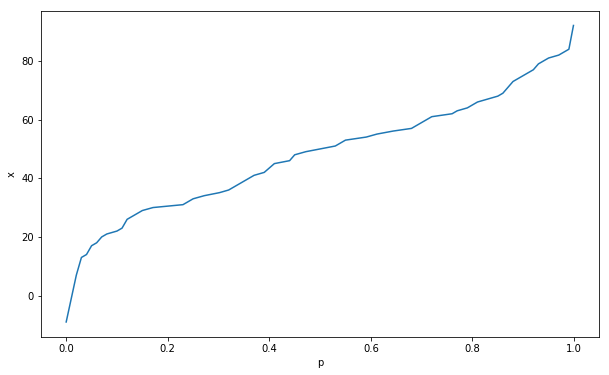

In [7]:
# 求逆函数

spl = interpolate.splrep(yy, xx, k=1)  
# 这种情况下线性插值（k=1）结果似乎更加可靠
xf0 = np.arange(0, 1, 0.001)
yf0 = interpolate.splev(xf0, spl)

fig = plt.figure(figsize=(10, 6))
plt.plot(xf0,yf0)
plt.xlabel('p')
plt.ylabel('x')
plt.show()

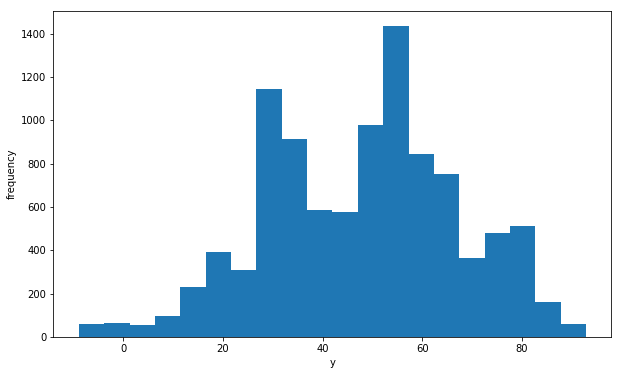

In [8]:
# 由{x}得到{y}

xf = np.random.rand(10000)
y = interpolate.splev(xf, spl)

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.hist(y, bins=20)
ax.set_xlabel('y')
ax.set_ylabel('frequency')
plt.show()

In [9]:
# KS检验

kst = stats.ks_2samp(x, y)
print(kst)

Ks_2sampResult(statistic=0.05820000000000003, pvalue=0.881339463975804)


### 3. 利用具有3个频率（周期）的正弦曲线，并加上随机误差，由此产生出一个时间序列。利用Fourier谱分析方法确定该时间序列的频率（周期）。

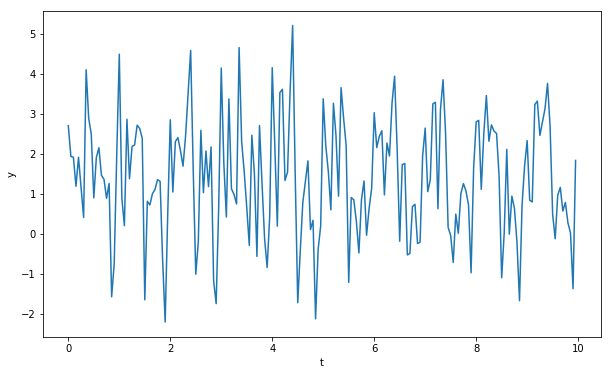

In [13]:
# 设置频率
f1 = 1
f2 = 3
f3 = 5


t = np.arange(0,10,0.05)   # dt=0.05
y = np.sin(2*np.pi*f1*t+0)+np.sin(2*np.pi*f2*t+1)+np.sin(2*np.pi*f3*t+2)
y = [a+np.random.uniform(0,3) for a in y]  # 引入误差

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.plot(t,y)
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()

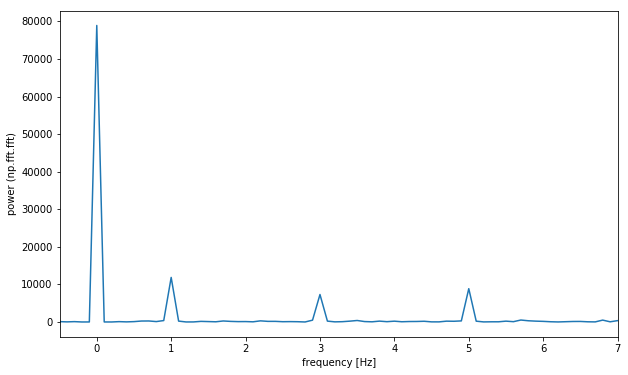

功率最大值对应频率： 0.0 Hz
功率次大值对应频率： 1.0 Hz
功率第三大值对应频率： 5.0 Hz
功率第四大值对应频率： 3.0 Hz


In [14]:
# fft功率谱检查

freqs = np.fft.fftfreq(np.size(t), 0.05)
idx = np.argsort(freqs)  # 频率由小到大的索引值
ps = np.abs(np.fft.fft(y))**2

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.plot(freqs[idx],ps[idx])
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('power (np.fft.fft)')
ax.set_xlim(-0.5,7)
plt.show()

fposi = []
pposi = []
for i in range(len(freqs)):
    if freqs[i] >=0:
        fposi.append(freqs[i])
        pposi.append(ps[i])
pindex_1 = np.argsort(pposi)
print('功率最大值对应频率：', freqs[pindex_1[-1]], 'Hz')
print('功率次大值对应频率：', freqs[pindex_1[-2]], 'Hz')
print('功率第三大值对应频率：', freqs[pindex_1[-3]], 'Hz')
print('功率第四大值对应频率：', freqs[pindex_1[-4]], 'Hz')

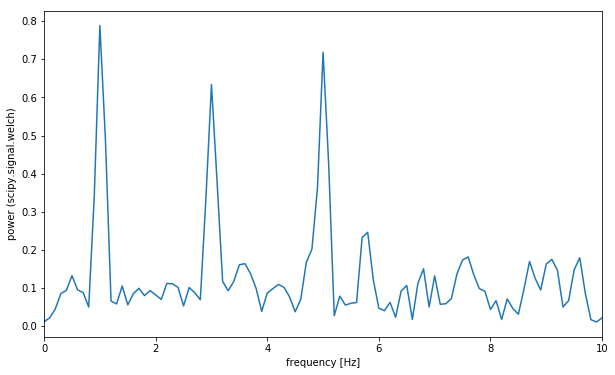

功率最大值对应频率： 1.0 Hz
功率次大值对应频率： 5.0 Hz
功率第三大值对应频率： 3.0 Hz


In [15]:
# signal功率谱检查

fs = 1/0.05
f, power2 = signal.welch(y, fs, 'hann', 200, scaling='spectrum')

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.plot(f, np.sqrt(power2))
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('power (scipy.signal.welch)')
ax.set_xlim(0,10)
plt.show()

pindex_2 = np.argsort(power2)
print('功率最大值对应频率：', freqs[pindex_2[-1]], 'Hz')
print('功率次大值对应频率：', freqs[pindex_2[-2]], 'Hz')
print('功率第三大值对应频率：', freqs[pindex_2[-3]], 'Hz')